## Training a word2vec model from scratch

-- Prof. Dorien Herremans

We will start by training a word2vec model from scratch using the gensim library. You will need to ensure that you have gensim installed, and a file decompressor to load our dataset. 

Note: these models may take a while to train. Be sure to switch the runtime of  Google Colab to us a TPU or GPU hardware accellerator (in the menu at the top). 

Let's start by installing some libraries that we will use:

In [3]:
!pip install gensim wget

     |████████████████████████████████| 24.2MB 2.0MB/s eta 0:00:011   |███▊                            | 2.8MB 60kB/s eta 0:05:57
     |████████████████████████████████| 71kB 9.9MB/s  eta 0:00:01
     |████████████████████████████████| 1.4MB 23.9MB/s eta 0:00:01
     |████████████████████████████████| 133kB 12.3MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/83/94/7179c3832a6d45b266ddb2aac329e101367fbdb11f425f13771d27f225bb/jmespath-0.9.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/16/8a/1fc3dba0c4923c2a76e1ff0d52b305c44606da63f718d14d3231e21c51b0/s3transfer-0.2.1-py2.py3-none-any.whl
     |████████████████████████████████| 5.4MB 26.9MB/s eta 0:00:01
     |████████████████████████████████| 552kB 24.0MB/s eta 0:00:01
  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=438c7470f25ab0f82ceefd6b94da6bfa0b72bf913e88be03ca421cdbac3e3df8
  Stored in directory: /home/krishna/.cache/pip/wheels/40/15/30/7d8f7cea29

Now we can import these libraries:

In [4]:
# imports needed 
import gensim
import wget

We will train our model using a very small dataset for demonstrative purposes. Note that for a real data science project you should train on a much larger dataset. 

We will use the complete works of Shakespeare. You can find the file at https://dorienherremans.com/drop/CDS/CNNs/shakespeare.txt

In [5]:
# download the dataset
wget.download("https://dorienherremans.com/drop/CDS/CNNs/shakespeare.txt")

'shakespeare.txt'

Let's read the input file and convert each line into a list of words (tokenizing). Do do this, we create a function read_input which is called in the penultimate line below: 

In [10]:
def read_input(file):
    print("Reading file...")
    with open(file, 'r') as f:
        for line in f.readlines():
            yield gensim.utils.simple_preprocess(line)
            
data_file = 'shakespeare.txt'
documents = list(read_input(data_file))
print("Done reading data file")

Reading file...
Done reading data file


In [11]:
documents

[[],
 [],
 ['the', 'sonnets'],
 [],
 ['by', 'william', 'shakespeare'],
 [],
 [],
 [],
 [],
 ['from', 'fairest', 'creatures', 'we', 'desire', 'increase'],
 ['that', 'thereby', 'beauty', 'rose', 'might', 'never', 'die'],
 ['but', 'as', 'the', 'riper', 'should', 'by', 'time', 'decease'],
 ['his', 'tender', 'heir', 'might', 'bear', 'his', 'memory'],
 ['but', 'thou', 'contracted', 'to', 'thine', 'own', 'bright', 'eyes'],
 ['feed',
  'st',
  'thy',
  'light',
  'flame',
  'with',
  'self',
  'substantial',
  'fuel'],
 ['making', 'famine', 'where', 'abundance', 'lies'],
 ['thy', 'self', 'thy', 'foe', 'to', 'thy', 'sweet', 'self', 'too', 'cruel'],
 ['thou', 'that', 'art', 'now', 'the', 'world', 'fresh', 'ornament'],
 ['and', 'only', 'herald', 'to', 'the', 'gaudy', 'spring'],
 ['within', 'thine', 'own', 'bud', 'buriest', 'thy', 'content'],
 ['and', 'tender', 'churl', 'mak', 'st', 'waste', 'in', 'niggarding'],
 ['pity', 'the', 'world', 'or', 'else', 'this', 'glutton', 'be'],
 ['to', 'eat', 'the'

Now let's train the word2vec model using our document variable (which is a list of word lists). Note that you can specify a number of hyperparameters below:
* min_count removes all words that occur less then min_count
* window: window size in the skip-gram
* workers: how many threads to use
* size: number of dimension of your new word embedding vector (typically 100-200). Smaller datasets require a smaller number



In [12]:
model = gensim.models.Word2Vec(documents, size=150, window=5, min_count=2, workers=4)
model.train(documents, total_examples=len(documents), epochs=10)

(6704898, 8675160)

That's it! Now you've trained the model! 

Now let's explore some properties of our new word space. You can get the words most close (read:  most similar) to a given word. Remember, the only texts the model has seen is shakespeare!

In [24]:
w1 = 'king'
model.wv.most_similar(positive=w1)

[('prince', 0.6723716259002686),
 ('duke', 0.5663737058639526),
 ('fifth', 0.5502867698669434),
 ('bolingbroke', 0.5463478565216064),
 ('warwick', 0.5304304361343384),
 ('plantagenets', 0.5207517147064209),
 ('emperor', 0.4994177520275116),
 ('gaunt', 0.49387574195861816),
 ('ghost', 0.48052629828453064),
 ('sixth', 0.4793555438518524)]

In [26]:
# look up top 6 words similar to 'smile'
w1 = "smile"
model.wv.most_similar(positive=w1, topn=6)

[('laugh', 0.7450898885726929),
 ('scowl', 0.7091900706291199),
 ('tremble', 0.7031119465827942),
 ('blush', 0.6986682415008545),
 ('grieve', 0.6928003430366516),
 ('rail', 0.676548421382904)]

In [27]:
# look up top 6 words similar to 'france'
w1 = "france"
model.wv.most_similar(positive=w1, topn=6)

[('england', 0.6463524103164673),
 ('princess', 0.6130849719047546),
 ('orleans', 0.5476872324943542),
 ('rome', 0.5452187061309814),
 ('wales', 0.542704701423645),
 ('venice', 0.5390613675117493)]

In [28]:
# look up top 6 words similar to 'sword'
w1 = "sword"
model.wv.most_similar(positive=w1, topn=6)

[('head', 0.7725961208343506),
 ('knife', 0.7360401153564453),
 ('throat', 0.7156818509101868),
 ('dagger', 0.7014476656913757),
 ('neck', 0.697060763835907),
 ('pocket', 0.6967877149581909)]

In [29]:
# get everything related to stuff on the royalty and not related to farmer
w1 = ['king', 'queen', 'prince']
w2 = ['farmer']
model.wv.most_similar(positive=w1, negative=w2, topn=10)

[('princess', 0.6418354511260986),
 ('duke', 0.6149895787239075),
 ('warwick', 0.5524898767471313),
 ('empress', 0.5427390336990356),
 ('emperor', 0.5411181449890137),
 ('bolingbroke', 0.5186953544616699),
 ('moor', 0.5018420815467834),
 ('comfort', 0.4975896179676056),
 ('gods', 0.49612128734588623),
 ('duchess', 0.49333080649375916)]

Explore the similarity (e.g. distance) between two words. Does it make sense?

In [31]:
# similarity between two similar words
model.wv.similarity(w1='pretty', w2='beautiful')

0.6124285

In [34]:
# similarity between two opposing words
model.wv.similarity('king', 'farmer')

-0.037099395

Try some other combinations :) 

We can even use it to perform more 'smart' assigments: 

In [35]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(['cat', 'dog', 'france'])

/home/krishna/anaconda3/envs/ai/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'france'

If you are interested in plotting the words in a multidimensional space, you can actually get the vector coordinates of each word: 

In [36]:
model.wv['france']

array([ 0.8422789 ,  0.5002423 ,  1.1610128 , -0.29045197,  0.22812973,
       -0.40653035, -0.02239777,  0.58035856, -0.246141  ,  0.2655486 ,
       -0.16201155, -0.23790397,  0.3386147 ,  0.11192676, -0.16987883,
        1.1652644 , -0.381824  ,  0.25145817, -0.5818469 ,  0.10751809,
       -0.25224808, -0.01874749, -0.3243887 ,  0.67510647,  1.4412327 ,
        0.92450833, -1.420935  ,  0.5700123 , -1.1651733 ,  1.046946  ,
       -1.2642452 , -1.0358223 , -0.41438326, -0.01712502, -0.32027057,
       -0.5684546 , -0.80846816, -0.53608334,  0.5647053 ,  1.1805706 ,
       -0.9820529 ,  0.5403022 , -0.84106606,  0.5602883 , -0.35347953,
       -1.4451612 , -1.0781739 , -0.6481522 , -0.1793738 , -0.01066696,
        0.15921672, -1.0887882 , -0.18935038,  0.9296747 ,  0.6702434 ,
        0.63578683, -0.90385145, -0.3640174 ,  1.1268635 ,  1.1350201 ,
       -0.4619989 ,  1.0109009 , -0.43486688, -0.9259985 ,  0.53131723,
       -0.20795377, -0.7561213 ,  0.0781768 ,  0.08956669, -0.70

## Bonus: visualising our model in t-SNE: 

/home/krishna/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


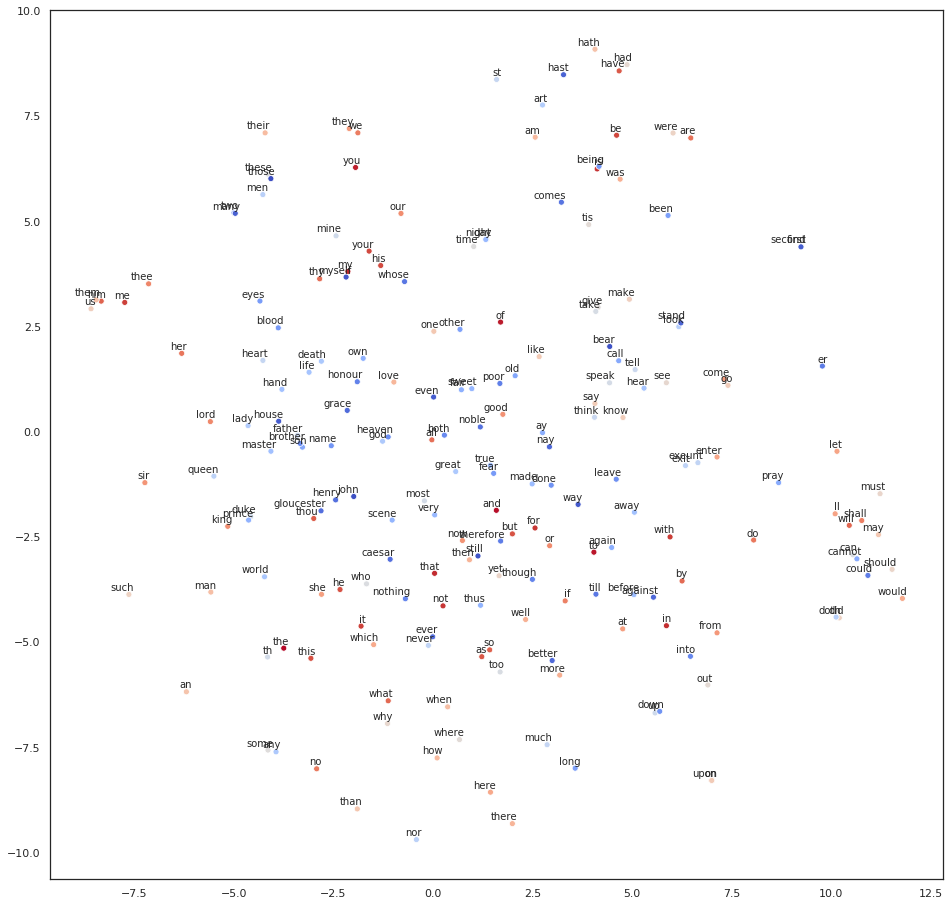

In [64]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
sns.set_style("white")
%matplotlib inline

def tsne_plot(model, count=100):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.index2entity[:count]:
        tokens.append(model[word])
        labels.append(word)
    
    # Compute t-SNE embeddings
    tsne = TSNE(perplexity=40, n_components=2, init='pca')
    embeddings = tsne.fit_transform(tokens)

    x = [v[0] for v in embeddings]
    y = [v[1] for v in embeddings]
        
    plt.figure(figsize=(16, 16))
    counts=[model.wv.vocab[l].count for l in labels]
    sns.scatterplot(x, y, hue=counts,
                    palette=sns.color_palette('coolwarm', len(np.unique(counts))),
                    legend=False)
    for i in range(len(x)):
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
tsne_plot(model, count=200)

## References

* https://radimrehurek.com/gensim/models/word2vec.html
* https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568
* https://github.com/kavgan/nlp-text-mining-working-examples/tree/master/word2vec
* https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5